In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_121933 (Custom).jpg
/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_121859 (Custom).jpg
/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_121423 (Custom).jpg
/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_121803 (Custom).jpg
/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_121506 (Custom).jpg
/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_121825 (Custom).jpg
/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_121817 (Custom).jpg
/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_121925 (Custom).jpg
/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_121758 (Custom).jpg
/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_121410 (Custom).jpg
/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_121904 (Custom).jpg
/kaggle/input/mangoleaf/MangoLeafBD/Test/Powdery Mildew/20211109_

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-07-28 09:30:37.281158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753695037.518167      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753695037.585929      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Importing data

In [3]:
train_dir = "/kaggle/input/mangoleaf/MangoLeafBD/Train"
test_dir = "/kaggle/input/mangoleaf/MangoLeafBD/Test"

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'  # çünkü birden fazla sınıf var
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 3277 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


Creating model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')  
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753695052.929363      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Compileing the model and model training

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1753695056.723093      77 service.cc:148] XLA service 0x7e167000a9e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753695056.724175      77 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1753695057.000060      77 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/103 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.1389 - loss: 3.4265

I0000 00:00:1753695059.337689      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


103/103 ━━━━━━━━━━━━━━━━━━━━ 28s 227ms/step - accuracy: 0.3207 - loss: 2.0857 - val_accuracy: 0.6338 - val_loss: 0.9495
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7839 - loss: 0.5957 - val_accuracy: 0.7138 - val_loss: 0.8182
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8895 - loss: 0.3258 - val_accuracy: 0.7588 - val_loss: 0.6725
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9520 - loss: 0.1668 - val_accuracy: 0.7962 - val_loss: 0.7130
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9535 - loss: 0.1443 - val_accuracy: 0.8075 - val_loss: 0.6587
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9564 - loss: 0.1282 - val_accuracy: 0.8438 - val_loss: 0.5155
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9871 - loss: 0.0452 - val_accuracy: 0.8662 - val_loss: 0.4504
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9998 - loss: 0.0116 - val_accuracy: 0.8

Visualising the model performance

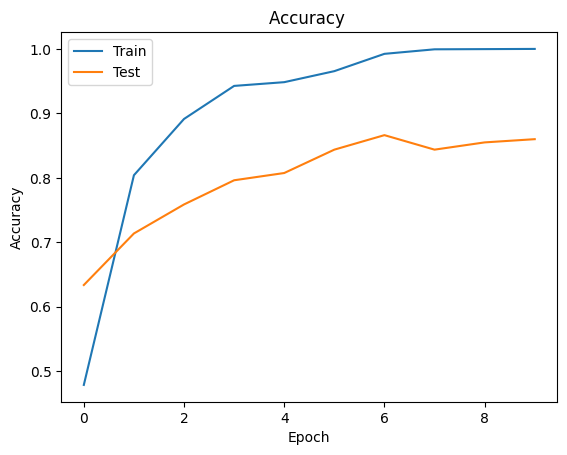

In [6]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title("Accuracy ")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

I am modifying some components and creating a new model in order to improve its performance.

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'  
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 3277 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(), 

    Dense(128, activation='relu'), 
    Dropout(0.5),

    Dense(8, activation='softmax')  
])

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=15,
    validation_data=test_data
)

Epoch 1/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.2116 - loss: 2.5184 - val_accuracy: 0.4450 - val_loss: 1.4332
Epoch 2/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.4225 - loss: 1.4833 - val_accuracy: 0.6062 - val_loss: 1.1694
Epoch 3/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5171 - loss: 1.1873 - val_accuracy: 0.6450 - val_loss: 0.9984
Epoch 4/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.6081 - loss: 0.9947 - val_accuracy: 0.7075 - val_loss: 0.9074
Epoch 5/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6341 - loss: 0.9041 - val_accuracy: 0.7212 - val_loss: 0.7982
Epoch 6/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6817 - loss: 0.8188 - val_accuracy: 0.6825 - val_loss: 0.8633
Epoch 7/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7034 - loss: 0.7646 - val_accuracy: 0.7425 - val_loss: 0.7019
Epoch 8/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7144 - loss: 0.7337 - val_acc

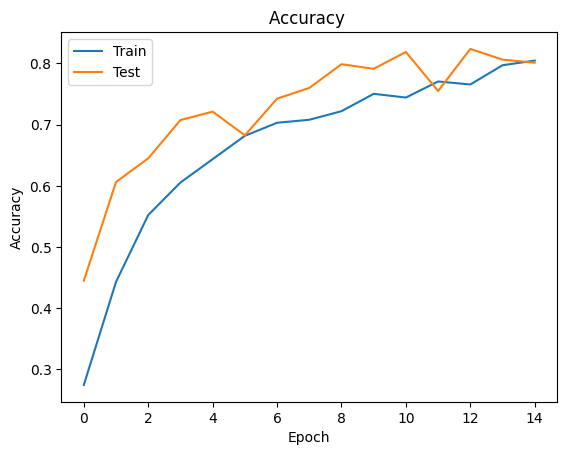

In [11]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title("Accuracy ")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()